<a href="https://colab.research.google.com/github/wakooota/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns,set()

#csvファイルをダウンロード
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
pip install japanize-matplotlib

In [4]:
import japanize_matplotlib
import seaborn as sns

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

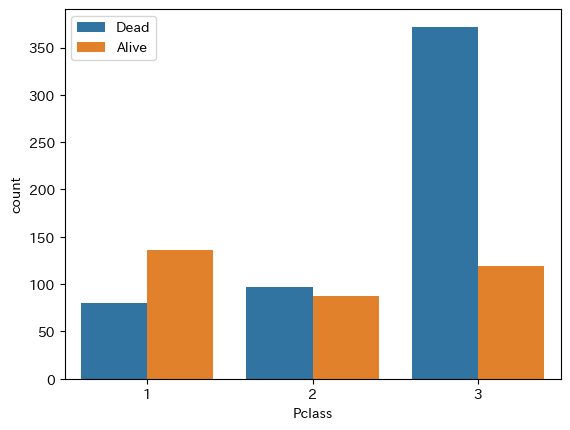

In [12]:
#Pclass（チケットランク）別の生存率
sns.countplot(x = 'Pclass', hue = 'Survived', data = train)
plt.legend(labels=["Dead", "Alive"])
plt.show()

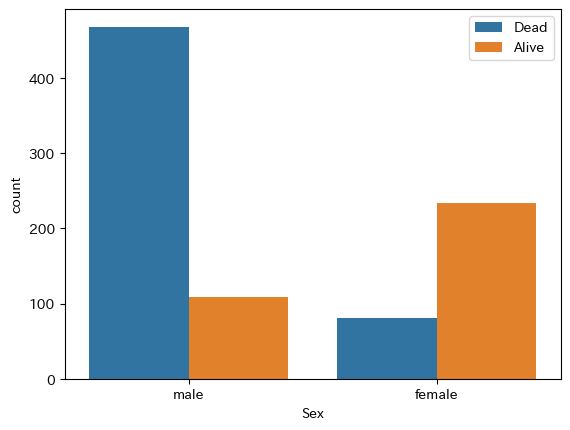

In [13]:
#Sex(性別)ごとの生存率
sns.countplot(x = 'Sex', hue = 'Survived', data = train)
plt.legend(labels=["Dead", "Alive"])
plt.show()

AttributeError: ignored

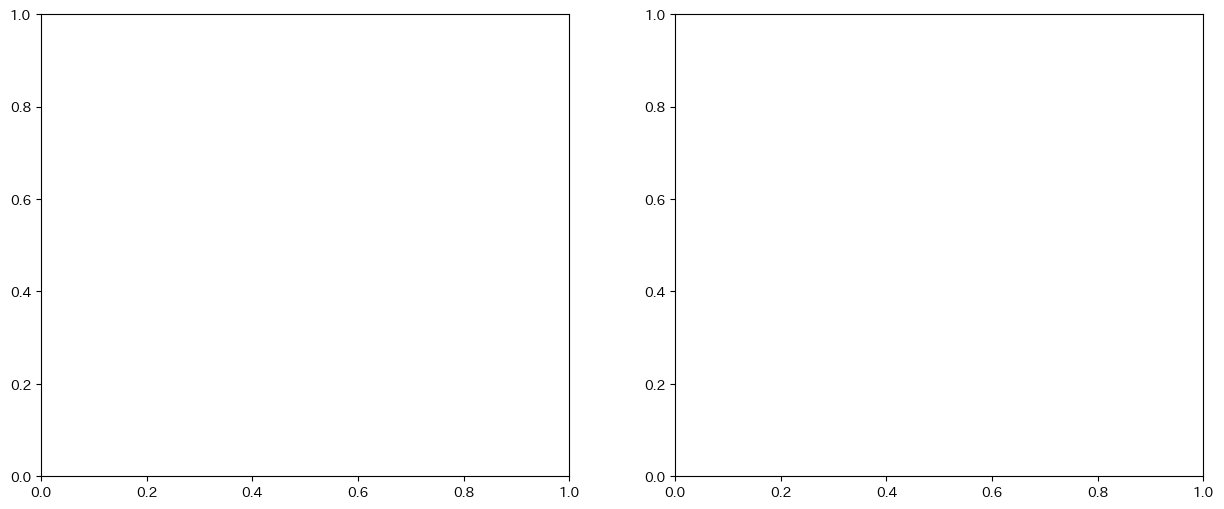

In [14]:
#Age(年齢)ごとの生存率
cmap = plt.get_cmap('tab10')
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
train[train['Survived']==0]['Age'].ax[0, 1].plot(kind='hist', bins=50, title='Dead')
train[train['Survived']==1]['Age'].ax[0, 0].plot(kind='hist', bins=50, title='Alive')

ax[0, 1].plt.ylabel('Count')
ax[0, 1].plt.ylim(0 , 40)
ax[0, 1].plt.show()

ax[0, 0].plt.ylabel('Count')
ax[0, 0].plt.ylim(0 , 40)
ax[0, 0].plt.show()

#【質問】調べたりしていますが、エラーが消えないです・・・・

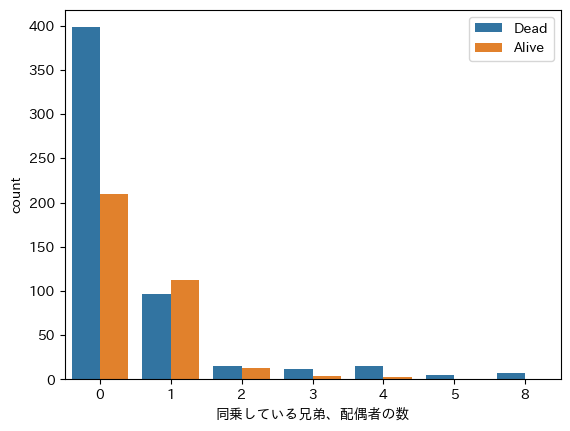

In [15]:
#Sibsp(同乗している兄弟、配偶者の数)ごとの生存率
p = sns.countplot(x = 'SibSp', hue = 'Survived', data = train)
plt.xlabel("同乗している兄弟、配偶者の数")
plt.legend(labels=["Dead", "Alive"])
plt.show()

#【質問】ラベルのつけ方はあっていますでしょうか。「0はDeadで1はAliveである」と記載したかったのですが、うまくいかなかったので、上述の通り記載して対処しました。

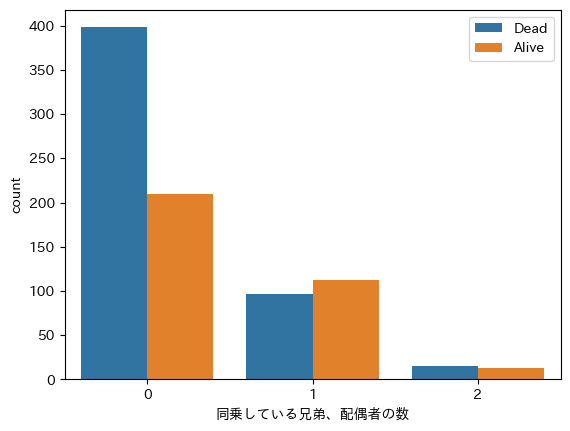

In [16]:
#【訓練】SibSpが3以上の情報を削除してグラフ化
droped_train = train.drop(train.query('SibSp > 2').index)
sns.countplot(x = 'SibSp', hue = 'Survived', data = droped_train)
plt.xlabel("同乗している兄弟、配偶者の数")
plt.legend(labels=["Dead", "Alive"])
plt.show()

<Axes: xlabel='SibSp', ylabel='Survived'>

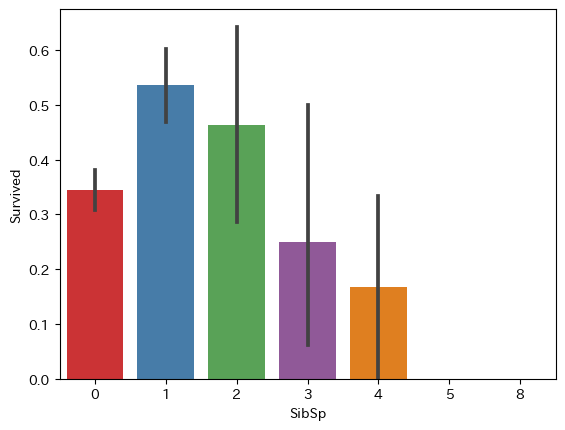

In [17]:
sns.barplot(x='SibSp', y='Survived', data=train, palette='Set1')

#【質問】これは生存率（SibSpごとのSurvivedの平均値）を示していそうだが、勝手に平均値が出力されるコードなのでしょうか。

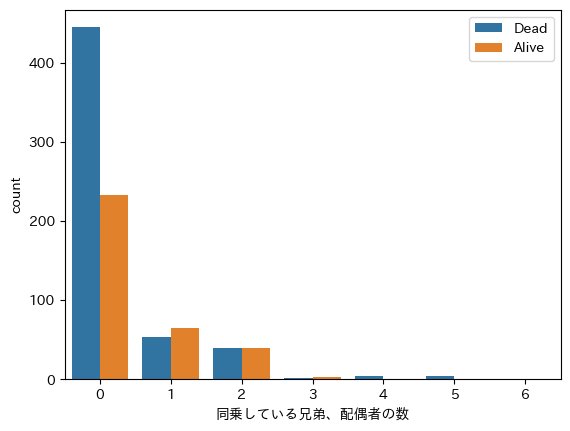

In [18]:
#Parch（同乗している兄弟、配偶者の数）ごとの生存率
sns.countplot(x = 'Parch', hue = 'Survived', data = train)
plt.xlabel("同乗している兄弟、配偶者の数")
plt.legend(labels=["Dead", "Alive"])
plt.show()

In [19]:
#Ticket（チケット番号）のヒストグラム

#Ticketの列に文字列型を含む情報がはいった行を削除
train[train['Ticket'] != str]['Ticket'].plt(kind='hist', bins=100)
plt.show()

#【質問】Ticketの列に文字列型を含む情報が入った行を削除してから、ヒストグラムで表示させたいが、うまくいかないです。

AttributeError: ignored

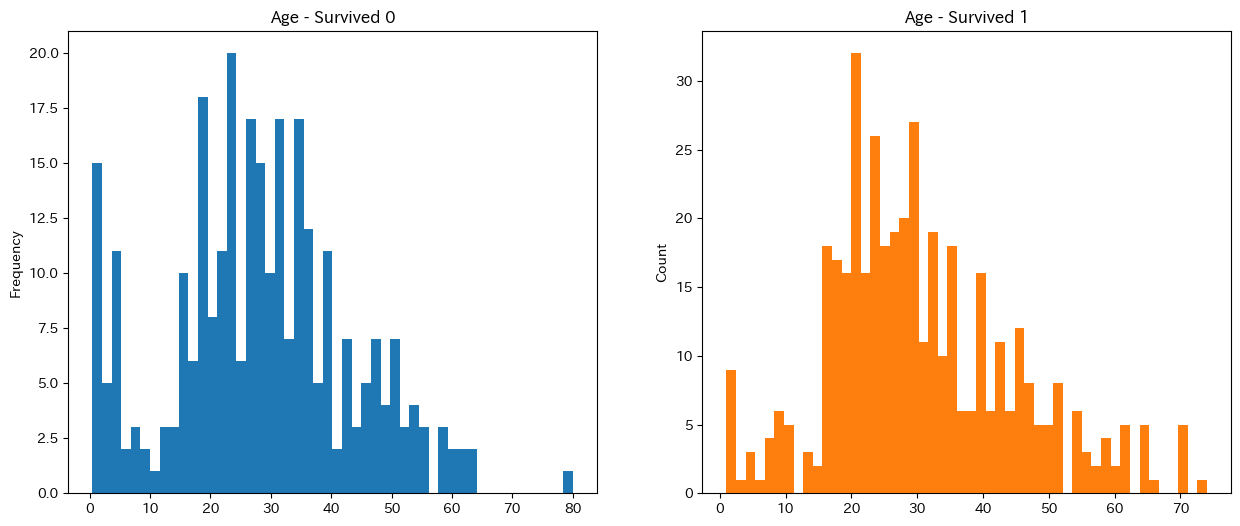

In [20]:
#テキストからコピー
cmap = plt.get_cmap('tab10')
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
train[train['Survived']==0]['Age'].plot(kind='hist', bins=50, title='{} - {} 1'.format('Age', 'Survived'), color=cmap(1), ax=ax[1])
train[train['Survived']==1]['Age'].plot(kind='hist', bins=50, title='{} - {} 0'.format('Age', 'Survived'), color=cmap(0), ax=ax[0])
plt.ylabel('Count')
plt.show()


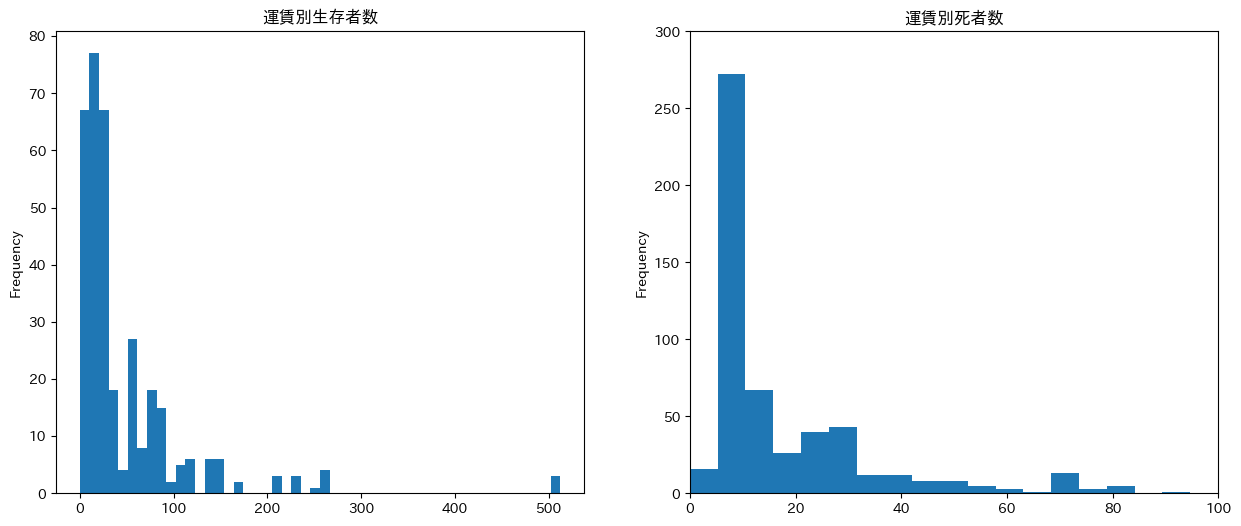

In [21]:
#Fare（運賃）のヒストグラム
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
train[train['Survived']==1]['Fare'].plot(kind='hist', bins=50, title = '運賃別生存者数'.format('Fare', 'Survived'), ax=ax[0])
train[train['Survived']==0]['Fare'].plot(kind='hist', bins=50, title = '運賃別死者数'.format('Fare', 'Survived'), ax=ax[1])

#縦軸をそろえる
plt.xlim(0, 100)
plt.ylim(0, 300)
plt.show()

#【質問】「運賃別生存者数」の横軸と縦軸を合わせたいのですが、サムライの教材をみたりしてax[x, x]を使ってみましたが、うまくいきませんでした。

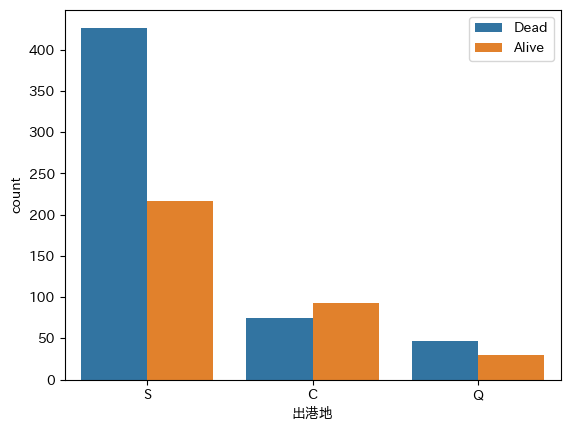

In [22]:
#Embarked（出向港）ごとの生存率
sns.countplot(x = 'Embarked', hue = 'Survived', data = train)
plt.xlabel("出港地")
plt.legend(labels=["Dead", "Alive"])


plt.show()

#【質問】グラフ上に数値を記載する方法もチャレンジしてみましたが、検索してもよい例がみつけられませんでした。
# https://www.delftstack.com/ja/howto/matplotlib/add-value-labels-on-matplotlib-bar-chart/ を参照して以下を追記しましたがうまくいきませんでした。
# def add_value_label(x_list, y_list):
#   add_value_lavel(x, hue)


<Axes: xlabel='Embarked', ylabel='count'>

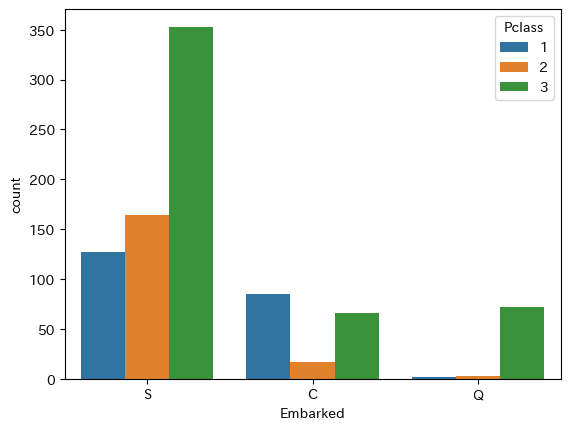

In [23]:
#なぜ出港地がCherbourgだと生存率が高いのか
#仮説：Cherbourgからの乗客はPclass1で乗船する割合が高い

#出港地別のPclassを確認
sns.countplot(x = 'Embarked', hue = 'Pclass', data = train)


In [24]:
from numpy.lib.index_tricks import c_
from itertools import count
#仮説「Cherbourgからの乗客はPclass1で乗船する割合が高い」を検証

#港ごとの乗船クラスの割合を計算して出力
#①Embarked情報には欠測値が2件あるが、全体数に比べて大きくないので当該情報は削除して検討をする。
df_riv_embarked = train.drop(train.query('Embarked.isnull()').index)

#Sからの乗船者
s_guest = df_riv_embarked.query("Embarked=='S'")['Embarked'].count()
#Sからの乗船者、かつ、Pclass1の数
s_guest_class1 = df_riv_embarked.query("Embarked=='S' & Pclass==1")['Embarked'].count()
ratio_class1_s = s_guest_class1/s_guest

print(f"Sから乗船した乗客のうち、Pclass1の割合:{ratio_class1_s}")

#Cからの乗船者
c_guest = df_riv_embarked.query("Embarked=='C'")['Embarked'].count()
#Cからの乗船者、かつ、Pclass1の数
c_guest_class1 = df_riv_embarked.query("Embarked=='C' & Pclass==1")['Embarked'].count()
ratio_class1_c = c_guest_class1/c_guest

print(f"Cから乗船した乗客のうち、Pclass1の割合:{ratio_class1_c}")

#Qからの乗船者
q_guest = df_riv_embarked.query("Embarked=='Q'")['Embarked'].count()
#Qからの乗船者、かつ、Pclass1の数
q_guest_class1 = df_riv_embarked.query("Embarked=='Q' & Pclass==1")['Embarked'].count()
ratio_class1_q = q_guest_class1/q_guest

print(f"Qから乗船した乗客のうち、Pclass1の割合:{ratio_class1_q}")

#仮説を立証
#"for"を使ってもっとシンプルに記載できるものでしょうか。

Sから乗船した乗客のうち、Pclass1の割合:0.1972049689440994
Cから乗船した乗客のうち、Pclass1の割合:0.5059523809523809
Qから乗船した乗客のうち、Pclass1の割合:0.025974025974025976


In [25]:
from numpy.lib.index_tricks import c_
from itertools import count
#仮説「Cherbourgからの乗客はPclass1で乗船する割合が高い」を検証

#港ごとの乗船クラスの割合を計算して出力
#①Embarked情報には欠測値が2件あるが、全体数に比べて大きくないので当該情報は削除して検討をする。
df_riv_embarked = train.drop(train.query('Embarked.isnull()').index)

ports = ["S", "C", "Q"]
for port in ports:

#portからの乗船者
  guest = df_riv_embarked.query("Embarked=='port'")['Embarked'].count()
#portからの乗船者、かつ、Pclass1の数
  guest_class1 = df_riv_embarked.query("Embarked=='port' & Pclass==1")['Embarked'].count()
  ratio_class1 = guest_class1/guest

  print(f"{port}から乗船した乗客のうち、Pclass1の割合:{ratio_class1}")

#【質問】エラーはでないのですが、なぜPclassの割合が"nan"になってしまうのでしょうか・・・


Sから乗船した乗客のうち、Pclass1の割合:nan
Cから乗船した乗客のうち、Pclass1の割合:nan
Qから乗船した乗客のうち、Pclass1の割合:nan


<ipython-input-25-2755e3af183f>:16: RuntimeWarning: invalid value encountered in long_scalars
  ratio_class1 = guest_class1/guest
<ipython-input-25-2755e3af183f>:16: RuntimeWarning: invalid value encountered in long_scalars
  ratio_class1 = guest_class1/guest
<ipython-input-25-2755e3af183f>:16: RuntimeWarning: invalid value encountered in long_scalars
  ratio_class1 = guest_class1/guest


In [45]:
#①こどもの可能性が高そうな乗客は低い年齢を設定できないか？
#乗客データからこどもだけを取り出してみる。
df_children = train.drop(train.query('Age > 11 or Age.isnull()').index)
df_children.describe()

#全体のSurviveの平均値（0.383838）よりも、10歳以下のSurviveの平均値（0..573529）はかなり大きい
#（手間はかかるが）課題に取り掛かる前に（全体のSurvivedの予測をする前に）、AgeがisnullのPassengerIDにおいて、機械学習で年齢を予測することをしてもよいかもしれない。

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,436.941176,0.573529,2.632353,4.664265,1.882353,1.426471,31.834803
std,278.794788,0.498241,0.596117,3.297692,1.643889,0.554928,26.504422
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700
25%,183.750000,0.000000,2.000000,2.000000,0.750000,1.000000,19.140600
50%,433.000000,1.000000,3.000000,4.000000,1.000000,1.000000,27.825000
75%,723.750000,1.000000,3.000000,8.000000,4.000000,2.000000,31.790625
max,870.000000,1.000000,3.000000,11.000000,5.000000,2.000000,151.550000


<Axes: xlabel='age_group', ylabel='Survived'>

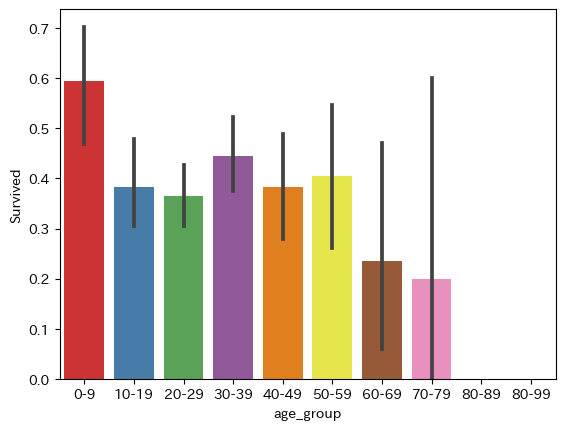

In [33]:
#年齢別の生存率を求め、年代別に差異があるかを確認する。

#①Age情報がない乗客をdfから落とす
df_riv_age = train.drop(train.query('Age.isnull()').index)

#②乗客を年代別にグルーピングする
list = df_riv_age['Age']
df_riv_age['age_group'] = pd.cut(list, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69','70-79', '80-89', '80-99'])

#③年齢別の生存率を出力
sns.barplot(x='age_group', y='Survived', data=df_riv_age, palette='Set1')


age_group
0-9       64
10-19    115
20-29    230
30-39    155
40-49     86
50-59     42
60-69     17
70-79      5
80-89      0
80-99      0
dtype: int64


<Axes: xlabel='age_group'>

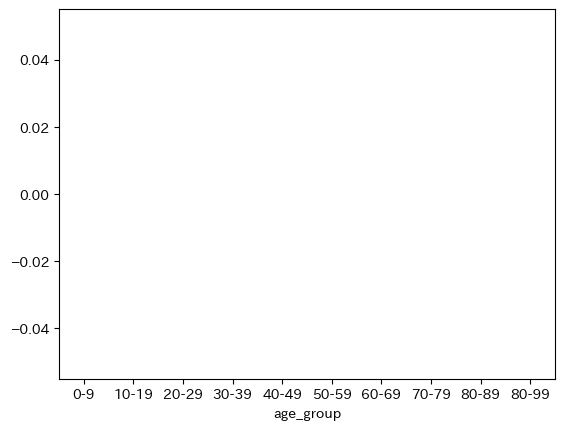

In [39]:
#③年齢別の人数を出力
p = df_riv_age.groupby('age_group').size()
print(p)

sns.barplot(x='age_group', y = p, data=df_riv_age, palette='Set1')

#年齢別の人数を確認して、60-80代の数は全体数宇に比べて多くないので、無視して良いこととする。
#【質問】グラフ上でうまくプロットできません。